In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymysql
import pickle
import joblib

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글지원
import platform
import seaborn as sns
plt.rc("font",family='Malgun Gothic') #한글_글꼴
plt.rcParams['axes.unicode_minus'] = False #음수표시

from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score

# 정확도
from sklearn.metrics import accuracy_score
# 정밀도
from sklearn.metrics import precision_score
# 재현율
from sklearn.metrics import recall_score
# f1-score
from sklearn.metrics import f1_score

In [5]:
def preprocessing(file_name, target_name) :
    # 파일 읽어들이기
    df = pd.read_csv("../cleaning/{}.csv".format(file_name))
    
    # 독립, 종속변수 정의
    input_data = df.iloc[:, 6:16].values
    target_data = df["fault_labeling"].values
    
    # 훈련:테스트(8 : 2)데이터 분할
    train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, random_state=42, test_size=0.2)
    
    # Standard Scaler 정규화
    ss = StandardScaler()
    ss.fit(train_input)
    train_scaled = ss.transform(train_input)
    test_scaled = ss.transform(test_input)
    
    ### 훈련모델 저장하기
    joblib.dump(ss, "./model/StandardScaler({}).pkl".format(target_name))
    
    return train_scaled, train_target, test_scaled, test_target

In [6]:
### PB
train_input_PB, train_target_PB, test_input_PB, test_target_PB = preprocessing("01.M02_preprocessing(PB)", "PB")

### PH
train_input_PH, train_target_PH, test_input_PH, test_target_PH = preprocessing("01.M02_preprocessing(PH)", "PH")

### FL
train_input_FL, train_target_FL, test_input_FL, test_target_FL = preprocessing("01.M02_preprocessing(FL)", "FL")

In [47]:
pd.read_csv("../cleaning/01.M02_preprocessing(PB).csv")

,time,stage,Lot,runnum,recipe,recipe_step,ACTUALROTATIONANGLE,ACTUALSTEPDURATION,ETCHBEAMCURRENT,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,ETCHSOURCEUSAGE,FIXTURETILTANGLE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,IONGAUGEPRESSURE,TTF_FlowCool Pressure Dropped Below Limit,fault,fault_labeling
0,3283834,1,9253,10511673,67,1,-0.122437,4.037785,-0.959509,-1.751661,-2.783162,2.395370,2.027848,-2.842907,-2.332807,-0.079428,623234.0,0,0
1,3283838,1,9253,10511673,67,1,-0.122437,4.037785,-0.959651,-1.743905,-2.780884,2.395370,2.027848,-2.842907,-2.332807,-0.079419,623230.0,0,0
2,3283842,1,9253,10511673,67,1,-0.122437,4.037785,-0.960006,-1.743905,-2.780884,2.395370,2.027848,-2.841850,-2.332807,-0.079409,623226.0,0,0
3,3283846,1,9253,10511673,67,1,-0.122437,4.037785,-0.959297,-1.747158,-2.780884,2.395370,2.027848,-2.841850,-2.332807,-0.079420,623222.0,0,0
4,3283850,1,9253,10511673,67,1,-0.122437,4.037785,-0.959438,-1.747158,-2.784389,2.395370,2.027848,-2.841850,-2.332807,-0.079430,623218.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637947,36797136,143,9652,12645359,69,1,-0.122437,-0.604941,-0.959226,-1.753413,-2.791223,0.988432,-0.646442,-2.839887,-2.018013,-0.079442,16.0,0,1
4637948,36797140,143,9652,12645359,69,1,-0.122437,-0.604941,-0.959297,-1.742404,-2.791223,0.988432,-0.646442,-2.839887,-2.029585,-0.079452,12.0,0,1
4637949,36797144,143,9652,12645359,69,1,-0.122437,-0.604941,-0.959651,-1.742404,-2.791223,0.988432,-0.646442,-2.842907,-2.039228,-0.079461,8.0,0,1
4637950,36797148,143,9652,12645359,69,1,-0.122437,-0.604941,-0.959438,-1.747158,-2.789997,0.988432,-0.646442,-2.842907,-2.053372,-0.079461,4.0,0,1


In [3]:
pd.read_csv("../cleaning/01.M02_preprocessing(PH).csv")

,time,stage,Lot,runnum,recipe,recipe_step,ACTUALROTATIONANGLE,ACTUALSTEPDURATION,ETCHBEAMCURRENT,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,ETCHSOURCEUSAGE,FIXTURETILTANGLE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,IONGAUGEPRESSURE,TTF_Flowcool Pressure Too High Check Flowcool Pump,fault,fault_labeling
0,3283834,1,9253,10511673,67,1,-0.122437,4.037785,-0.959509,-1.751661,-2.783162,2.395370,2.027848,-2.842907,-2.332807,-0.079428,9146470.0,0,0
1,3283838,1,9253,10511673,67,1,-0.122437,4.037785,-0.959651,-1.743905,-2.780884,2.395370,2.027848,-2.842907,-2.332807,-0.079419,9146466.0,0,0
2,3283842,1,9253,10511673,67,1,-0.122437,4.037785,-0.960006,-1.743905,-2.780884,2.395370,2.027848,-2.841850,-2.332807,-0.079409,9146462.0,0,0
3,3283846,1,9253,10511673,67,1,-0.122437,4.037785,-0.959297,-1.747158,-2.780884,2.395370,2.027848,-2.841850,-2.332807,-0.079420,9146458.0,0,0
4,3283850,1,9253,10511673,67,1,-0.122437,4.037785,-0.959438,-1.747158,-2.784389,2.395370,2.027848,-2.841850,-2.332807,-0.079430,9146454.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772784,31427334,1,9643,12310888,67,33,-0.122455,0.021044,1.370556,1.413639,0.360776,-1.522929,1.359276,-0.287824,-0.187123,0.031457,16.0,0,1
3772785,31427338,1,9643,12310888,67,33,-0.122455,0.021044,1.373038,1.413639,0.360776,-1.522925,1.359276,-0.256720,-0.191631,0.031457,12.0,0,1
3772786,31427342,1,9643,12310888,67,33,-0.122455,0.021044,1.373749,1.424642,0.362004,-1.522922,1.359276,-0.286919,-0.189693,0.031457,8.0,0,1
3772787,31427346,1,9643,12310888,67,33,-0.122455,0.021044,1.379778,1.424642,0.362004,-1.522919,1.359276,-0.287824,-0.188408,0.031457,4.0,0,1


In [4]:
pd.read_csv("../cleaning/01.M02_preprocessing(FL).csv")

,time,stage,Lot,runnum,recipe,recipe_step,ACTUALROTATIONANGLE,ACTUALSTEPDURATION,ETCHBEAMCURRENT,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,ETCHSOURCEUSAGE,FIXTURETILTANGLE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,IONGAUGEPRESSURE,TTF_Flowcool leak,fault,fault_labeling
0,3283834,1,9253,10511673,67,1,-0.122437,4.037785,-0.959509,-1.751661,-2.783162,2.395370,2.027848,-2.842907,-2.332807,-0.079428,632514.0,0,0
1,3283838,1,9253,10511673,67,1,-0.122437,4.037785,-0.959651,-1.743905,-2.780884,2.395370,2.027848,-2.842907,-2.332807,-0.079419,632510.0,0,0
2,3283842,1,9253,10511673,67,1,-0.122437,4.037785,-0.960006,-1.743905,-2.780884,2.395370,2.027848,-2.841850,-2.332807,-0.079409,632506.0,0,0
3,3283846,1,9253,10511673,67,1,-0.122437,4.037785,-0.959297,-1.747158,-2.780884,2.395370,2.027848,-2.841850,-2.332807,-0.079420,632502.0,0,0
4,3283850,1,9253,10511673,67,1,-0.122437,4.037785,-0.959438,-1.747158,-2.784389,2.395370,2.027848,-2.841850,-2.332807,-0.079430,632498.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4633718,36767388,1,9746,12643526,67,25,9.597747,-0.657107,-0.959297,-1.748909,-2.792450,0.973152,-0.980728,-2.840944,-1.367433,-0.079188,18.0,0,1
4633719,36767392,1,9746,12643526,67,25,9.597747,-0.657107,-0.959226,-1.751661,-2.792450,0.973152,-0.980728,-2.840944,-1.401504,-0.079236,14.0,0,1
4633720,36767396,1,9746,12643526,67,26,9.597747,-0.657107,-0.959226,-1.751661,-2.789997,0.973152,-0.980728,-2.840944,-1.462577,-0.079256,10.0,0,1
4633721,36767400,1,9746,12643526,67,26,9.597747,-0.657107,-0.959580,-1.751661,-2.789997,0.973152,-0.980728,-2.842907,-1.488934,-0.079276,6.0,0,1


# XGB

In [18]:
def xgb_model(target_name, train_input, train_target, test_input, test_target) :
    ### 모델 정의 및 훈련
    model = XGBClassifier(random_state=42)
    model.fit(train_input, train_target)

    ### 예측하기
    pred = model.predict(test_input)
    
    ### 오차행렬도 그리기
    # - 오차 평가 매트릭스
    cm = confusion_matrix(test_target, pred, labels=model.classes_)
    # - 오차행렬도 그리기
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    matrix = disp.plot()
    
    ### 정확도, 정밀도, 재현율, f1-score 확인하기
    ### 정확도
    accuracy = accuracy_score(test_target, pred)

    ### 정밀도
    precision = precision_score(test_target, pred)

    ### 재현율
    recall = recall_score(test_target, pred)

    ### f1-score
    score = f1_score(test_target, pred)

    ### 훈련모델 저장하기
    #joblib.dump(model, "./model/XGB_model({}).pkl".format(target_name))

    return accuracy, precision, recall, score, matrix

(0.9994210810583544,
 0.8599190283400809,
 0.7447405329593267,
 0.7981961668545658,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x23f1bdd7e20>)

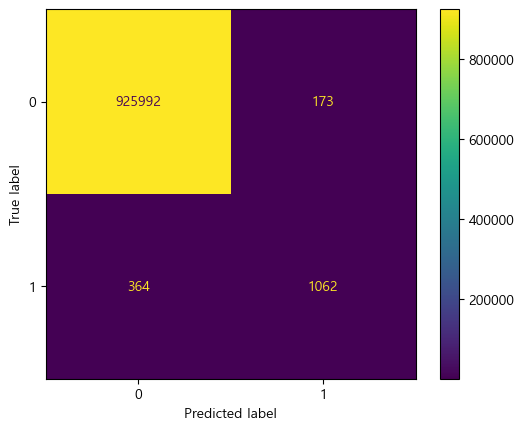

In [20]:
### PB
xgb_model("PB", train_input_PB, train_target_PB, test_input_PB, test_target_PB)

(0.9999191579706265,
 0.8333333333333334,
 0.7878787878787878,
 0.809968847352025,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x23f1d8be0d0>)

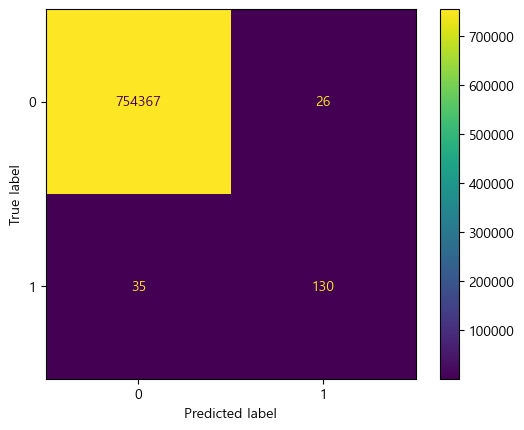

In [21]:
### PH
xgb_model("PH", train_input_PH, train_target_PH, test_input_PH, test_target_PH)

(0.9998608031335481,
 0.8579545454545454,
 0.7926509186351706,
 0.8240109140518417,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x23f429d3d90>)

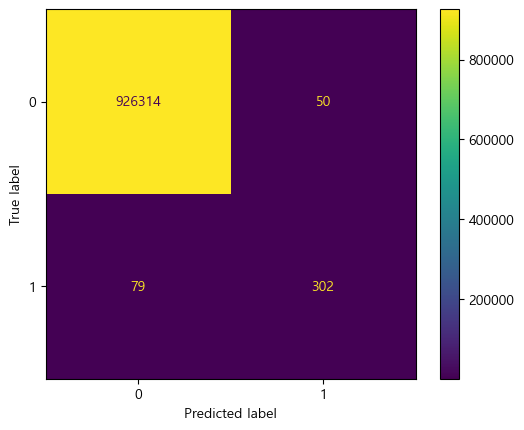

In [22]:
### FL
xgb_model("FL", train_input_FL, train_target_FL, test_input_FL, test_target_FL)

# 랜덤 포레스트

In [7]:
def rf_model(target_name, train_input, train_target, test_input, test_target) :
    ### 모델 정의 및 훈련
    model = RandomForestClassifier(random_state=42)
    model.fit(train_input, train_target)

    ### 예측하기
    pred = model.predict(test_input)
    
    ### 오차행렬도 그리기
    # - 오차 평가 매트릭스
    cm = confusion_matrix(test_target, pred, labels=model.classes_)
    # - 오차행렬도 그리기
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    matrix = disp.plot()
    
    ### 훈련모델 저장하기
    joblib.dump(model, "./model/RF_model({}).pkl".format(target_name))

    return print(classification_report(test_target, pred)), matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    926165
           1       0.98      0.93      0.95      1426

    accuracy                           1.00    927591
   macro avg       0.99      0.97      0.98    927591
weighted avg       1.00      1.00      1.00    927591

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    754393
           1       1.00      0.99      1.00       165

    accuracy                           1.00    754558
   macro avg       1.00      1.00      1.00    754558
weighted avg       1.00      1.00      1.00    754558

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    926364
           1       0.92      0.89      0.91       381

    accuracy                           1.00    926745
   macro avg       0.96      0.95      0.95    926745
weighted avg       1.00      1.00      1.00    926745



(None,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x22fe9ac2f70>)

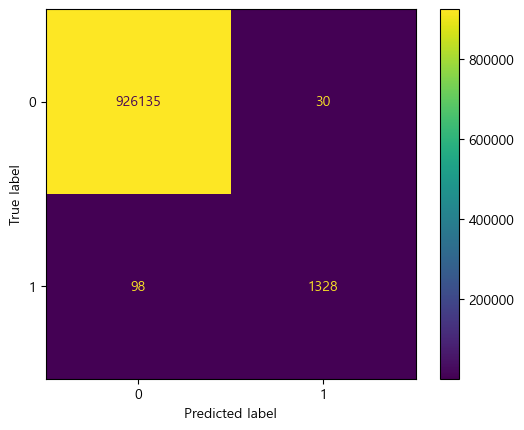

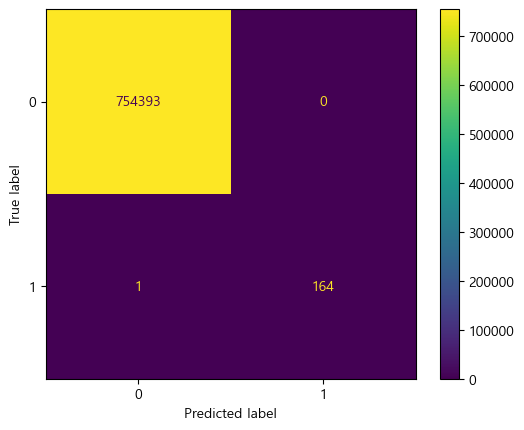

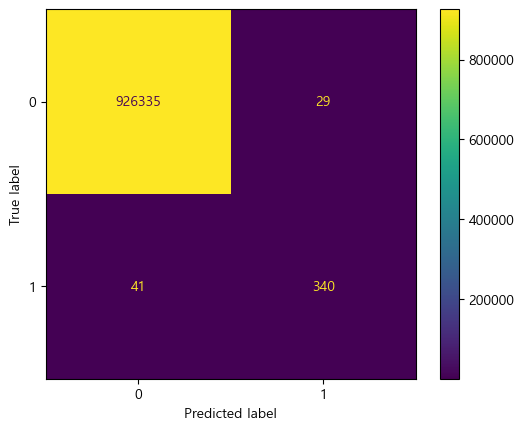

In [8]:
### PB
rf_model("PB", train_input_PB, train_target_PB, test_input_PB, test_target_PB)

### PH
rf_model("PH", train_input_PH, train_target_PH, test_input_PH, test_target_PH)

### FL
rf_model("FL", train_input_FL, train_target_FL, test_input_FL, test_target_FL)

In [45]:
model_df = pd.DataFrame({"Model" : ["XGB", "", "", "Random Forest", "", ""], 
                  "Flowcool" : ["FlowCool Pressure Dropped Below Limit", "Flowcool Pressure Too High Check Flowcool Pump", "Flowcool leak",
                                    "FlowCool Pressure Dropped Below Limit", "Flowcool Pressure Too High Check Flowcool Pump", "Flowcool leak"], 
                  "Accuracy" : [0.9994210810583544, 0.9999191579706265, 0.9998608031335481, 0.9998620081479876, 0.99999867472083, 0.999924466816654], 
                  "Precision" : [0.8599190283400809,  0.8333333333333334, 0.8579545454545454, 0.9779086892488954, 1.0, 0.9214092140921409],
                 "Recall" : [0.7447405329593267, 0.7878787878787878, 0.7926509186351706, 0.9312762973352033, 0.9939393939393939, 0.8923884514435696],
                 "F1-score" : [0.7981961668545658, 0.809968847352025, 0.8240109140518417, 0.9540229885057472, 0.9969604863221885, 0.9066666666666667]})
model_df

,Model,Flowcool,Accuracy,Precision,Recall,F1-score
0,XGB,FlowCool Pressure Dropped Below Limit,0.999421,0.859919,0.744741,0.798196
1,,Flowcool Pressure Too High Check Flowcool Pump,0.999919,0.833333,0.787879,0.809969
2,,Flowcool leak,0.999861,0.857955,0.792651,0.824011
3,Random Forest,FlowCool Pressure Dropped Below Limit,0.999862,0.977909,0.931276,0.954023
4,,Flowcool Pressure Too High Check Flowcool Pump,0.999999,1.000000,0.993939,0.996960
5,,Flowcool leak,0.999924,0.921409,0.892388,0.906667
